# Data Analysis with pandas

## The DataFrame Class

### First Steps with the DataFrame Class

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame([10, 20, 30, 40],
                  columns=['numbers'],
                  index=['a', 'b', 'c', 'd'])

In [3]:
df

,numbers
a,10
b,20
c,30
d,40


In [4]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [5]:
df.columns

Index(['numbers'], dtype='object')

In [6]:
df.loc['c']

numbers    30
Name: c, dtype: int64

In [7]:
df.loc[['a', 'd']]

,numbers
a,10
d,40


In [8]:
df.iloc[1:3]

,numbers
b,20
c,30


In [9]:
df.sum()

numbers    100
dtype: int64

In [10]:
df.apply(lambda x: x ** 2)

,numbers
a,100
b,400
c,900
d,1600


In [11]:
df ** 2

,numbers
a,100
b,400
c,900
d,1600


In [12]:
df['floats'] = (1.5, 2.5, 3.5, 4.5) # add a new column
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [13]:
df['floats']

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [14]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'],
                           index=['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [15]:
# df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'},
#          ignore_index=True)
# pandas 2.0.0 버전에서는 위 코드가 에러가 발생한다. concat() 함수를 사용해야 한다. 
# axis=0은 행을 추가하라는 의미 axis=1은 열을 추가하라는 의미.
# 리스트로 넣어야 하는 이유는 각 키에 대해 값이 단일 값(스칼라)으로 제공되기 때문
pd.concat([df, 
           pd.DataFrame({'numbers': [100], 
                         'floats': [5.75], 
                         'names': ['Henry']})], 
          ignore_index=True)  


,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


In [16]:
# df = df.append(pd.DataFrame({'numbers': 100, 
#                              'floats': 5.75, 
#                              'names': 'Henry'}, index=['y',]))

# index 매개변수를 사용하여 데이터프레임의 행 인덱스를 명시적으로 설정했기 때문에 
# 딕셔너리의 각 키('numbers', 'floats', 'names')에 대해 단일값(스칼라)이 제공되지만
# index=['y',]를 통해 단일 행 인덱스를 제공되어 하나의 행으로 해석하며
# 각 키에 대한 값은 해당 행의 열 값으로 설정됨.
df = pd.concat([df, pd.DataFrame({'numbers': 100,
                                  'floats': 5.75,
                                  'names': 'Henry'}, index=['y',])])
df

,numbers,floats,names
a,10,1.50,Guido
b,20,2.50,Felix
c,30,3.50,Francesc
d,40,4.50,Yves
y,100,5.75,Henry


In [17]:
# df = df.append(pd.DataFrame({'names': 'Louie'}, index=['z',]), sort=False)
df = pd.concat([df, pd.DataFrame({'names': 'Louie'}, 
                                 index=['z',])], sort=False)
df

,numbers,floats,names
a,10.0,1.50,Guido
b,20.0,2.50,Felix
c,30.0,3.50,Francesc
d,40.0,4.50,Yves
y,100.0,5.75,Henry
z,NaN,NaN,Louie


In [18]:
df.dtypes

numbers    float64
floats     float64
names       object
dtype: object

In [19]:
df[['numbers', 'floats']].mean()

numbers    40.00
floats      3.55
dtype: float64

In [20]:
df[['numbers', 'floats']].std()

numbers    35.355339
floats      1.662077
dtype: float64

### Second Steps with the DataFrame Class

In [21]:
import numpy as np
np.random.seed(100)
a = np.random.standard_normal((9, 4))
a

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

In [22]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163
3,-0.583595,0.816847,0.672721,-0.104411
4,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436
6,0.184519,0.937082,0.731000,1.361556
7,-0.326238,0.055676,0.222400,-1.443217
8,-0.756352,0.816454,0.750445,-0.455947


In [23]:
df.columns = ['No1', 'No2', 'No3', 'No4']
df

,No1,No2,No3,No4
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163
3,-0.583595,0.816847,0.672721,-0.104411
4,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436
6,0.184519,0.937082,0.731000,1.361556
7,-0.326238,0.055676,0.222400,-1.443217
8,-0.756352,0.816454,0.750445,-0.455947


In [24]:
df['No2'].mean()

0.7010330941456459

In [25]:
dates = pd.date_range('2019-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30'],
              dtype='datetime64[ns]', freq='M')

In [26]:
df.index = dates
df

,No1,No2,No3,No4
2019-01-31,-1.749765,0.342680,1.153036,-0.252436
2019-02-28,0.981321,0.514219,0.221180,-1.070043
2019-03-31,-0.189496,0.255001,-0.458027,0.435163
2019-04-30,-0.583595,0.816847,0.672721,-0.104411
2019-05-31,-0.531280,1.029733,-0.438136,-1.118318
2019-06-30,1.618982,1.541605,-0.251879,-0.842436
2019-07-31,0.184519,0.937082,0.731000,1.361556
2019-08-31,-0.326238,0.055676,0.222400,-1.443217
2019-09-30,-0.756352,0.816454,0.750445,-0.455947


In [27]:
df.values

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

In [28]:
np.array(df)

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

## Basic Analytics

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2019-01-31 to 2019-09-30
Freq: M
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No1     9 non-null      float64
 1   No2     9 non-null      float64
 2   No3     9 non-null      float64
 3   No4     9 non-null      float64
dtypes: float64(4)
memory usage: 360.0 bytes


In [30]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.150212,0.701033,0.289193,-0.387788
std,0.988306,0.457685,0.579920,0.877532
min,-1.749765,0.055676,-0.458027,-1.443217
25%,-0.583595,0.342680,-0.251879,-1.070043
50%,-0.326238,0.816454,0.222400,-0.455947
75%,0.184519,0.937082,0.731000,-0.104411
max,1.618982,1.541605,1.153036,1.361556


In [31]:
df.sum()

No1   -1.351906
No2    6.309298
No3    2.602739
No4   -3.490089
dtype: float64

In [32]:
df.mean()

No1   -0.150212
No2    0.701033
No3    0.289193
No4   -0.387788
dtype: float64

In [33]:
df.mean(axis=0)

No1   -0.150212
No2    0.701033
No3    0.289193
No4   -0.387788
dtype: float64

In [34]:
df.mean(axis=1)

2019-01-31   -0.126621
2019-02-28    0.161669
2019-03-31    0.010661
2019-04-30    0.200390
2019-05-31   -0.264500
2019-06-30    0.516568
2019-07-31    0.803539
2019-08-31   -0.372845
2019-09-30    0.088650
Freq: M, dtype: float64

In [35]:
df.cumsum()

,No1,No2,No3,No4
2019-01-31,-1.749765,0.342680,1.153036,-0.252436
2019-02-28,-0.768445,0.856899,1.374215,-1.322479
2019-03-31,-0.957941,1.111901,0.916188,-0.887316
2019-04-30,-1.541536,1.928748,1.588909,-0.991727
2019-05-31,-2.072816,2.958480,1.150774,-2.110045
2019-06-30,-0.453834,4.500086,0.898895,-2.952481
2019-07-31,-0.269316,5.437168,1.629895,-1.590925
2019-08-31,-0.595554,5.492844,1.852294,-3.034142
2019-09-30,-1.351906,6.309298,2.602739,-3.490089


In [36]:
np.mean(df)

0.1130567313677401

In [37]:
np.mean(df, axis=0)

No1   -0.150212
No2    0.701033
No3    0.289193
No4   -0.387788
dtype: float64

In [38]:
np.mean(df, axis=1)

2019-01-31   -0.126621
2019-02-28    0.161669
2019-03-31    0.010661
2019-04-30    0.200390
2019-05-31   -0.264500
2019-06-30    0.516568
2019-07-31    0.803539
2019-08-31   -0.372845
2019-09-30    0.088650
Freq: M, dtype: float64

In [39]:
np.log(df)

/Users/birdblues/anaconda3/envs/my_env/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,No1,No2,No3,No4
2019-01-31,NaN,-1.070957,0.142398,NaN
2019-02-28,-0.018856,-0.665106,-1.508780,NaN
2019-03-31,NaN,-1.366486,NaN,-0.832033
2019-04-30,NaN,-0.202303,-0.396425,NaN
2019-05-31,NaN,0.029299,NaN,NaN
2019-06-30,0.481797,0.432824,NaN,NaN
2019-07-31,-1.690005,-0.064984,-0.313341,0.308628
2019-08-31,NaN,-2.888206,-1.503279,NaN
2019-09-30,NaN,-0.202785,-0.287089,NaN


In [40]:
np.sqrt(abs(df))

,No1,No2,No3,No4
2019-01-31,1.322787,0.585389,1.073795,0.502430
2019-02-28,0.990616,0.717091,0.470297,1.034429
2019-03-31,0.435311,0.504977,0.676777,0.659669
2019-04-30,0.763934,0.903796,0.820196,0.323127
2019-05-31,0.728890,1.014757,0.661918,1.057506
2019-06-30,1.272392,1.241614,0.501876,0.917843
2019-07-31,0.429556,0.968030,0.854986,1.166857
2019-08-31,0.571173,0.235958,0.471593,1.201340
2019-09-30,0.869685,0.903578,0.866282,0.675238


In [41]:
np.sqrt(abs(df)).sum()

No1    7.384345
No2    7.075190
No3    6.397719
No4    7.538440
dtype: float64

In [42]:
100 * df + 100

,No1,No2,No3,No4
2019-01-31,-74.976547,134.268040,215.303580,74.756396
2019-02-28,198.132079,151.421884,122.117967,-7.004333
2019-03-31,81.050417,125.500144,54.197301,143.516349
2019-04-30,41.640495,181.684707,167.272081,89.558886
2019-05-31,46.871962,202.973269,56.186438,-11.831825
2019-06-30,261.898166,254.160517,74.812086,15.756426
2019-07-31,118.451869,193.708220,173.100034,236.155613
2019-08-31,67.376194,105.567601,122.239961,-44.321700
2019-09-30,24.364769,181.645401,175.044476,54.405307


## Basic Visualization

In [43]:
from pylab import plt, mpl

print(plt.style.available)
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Axes: >

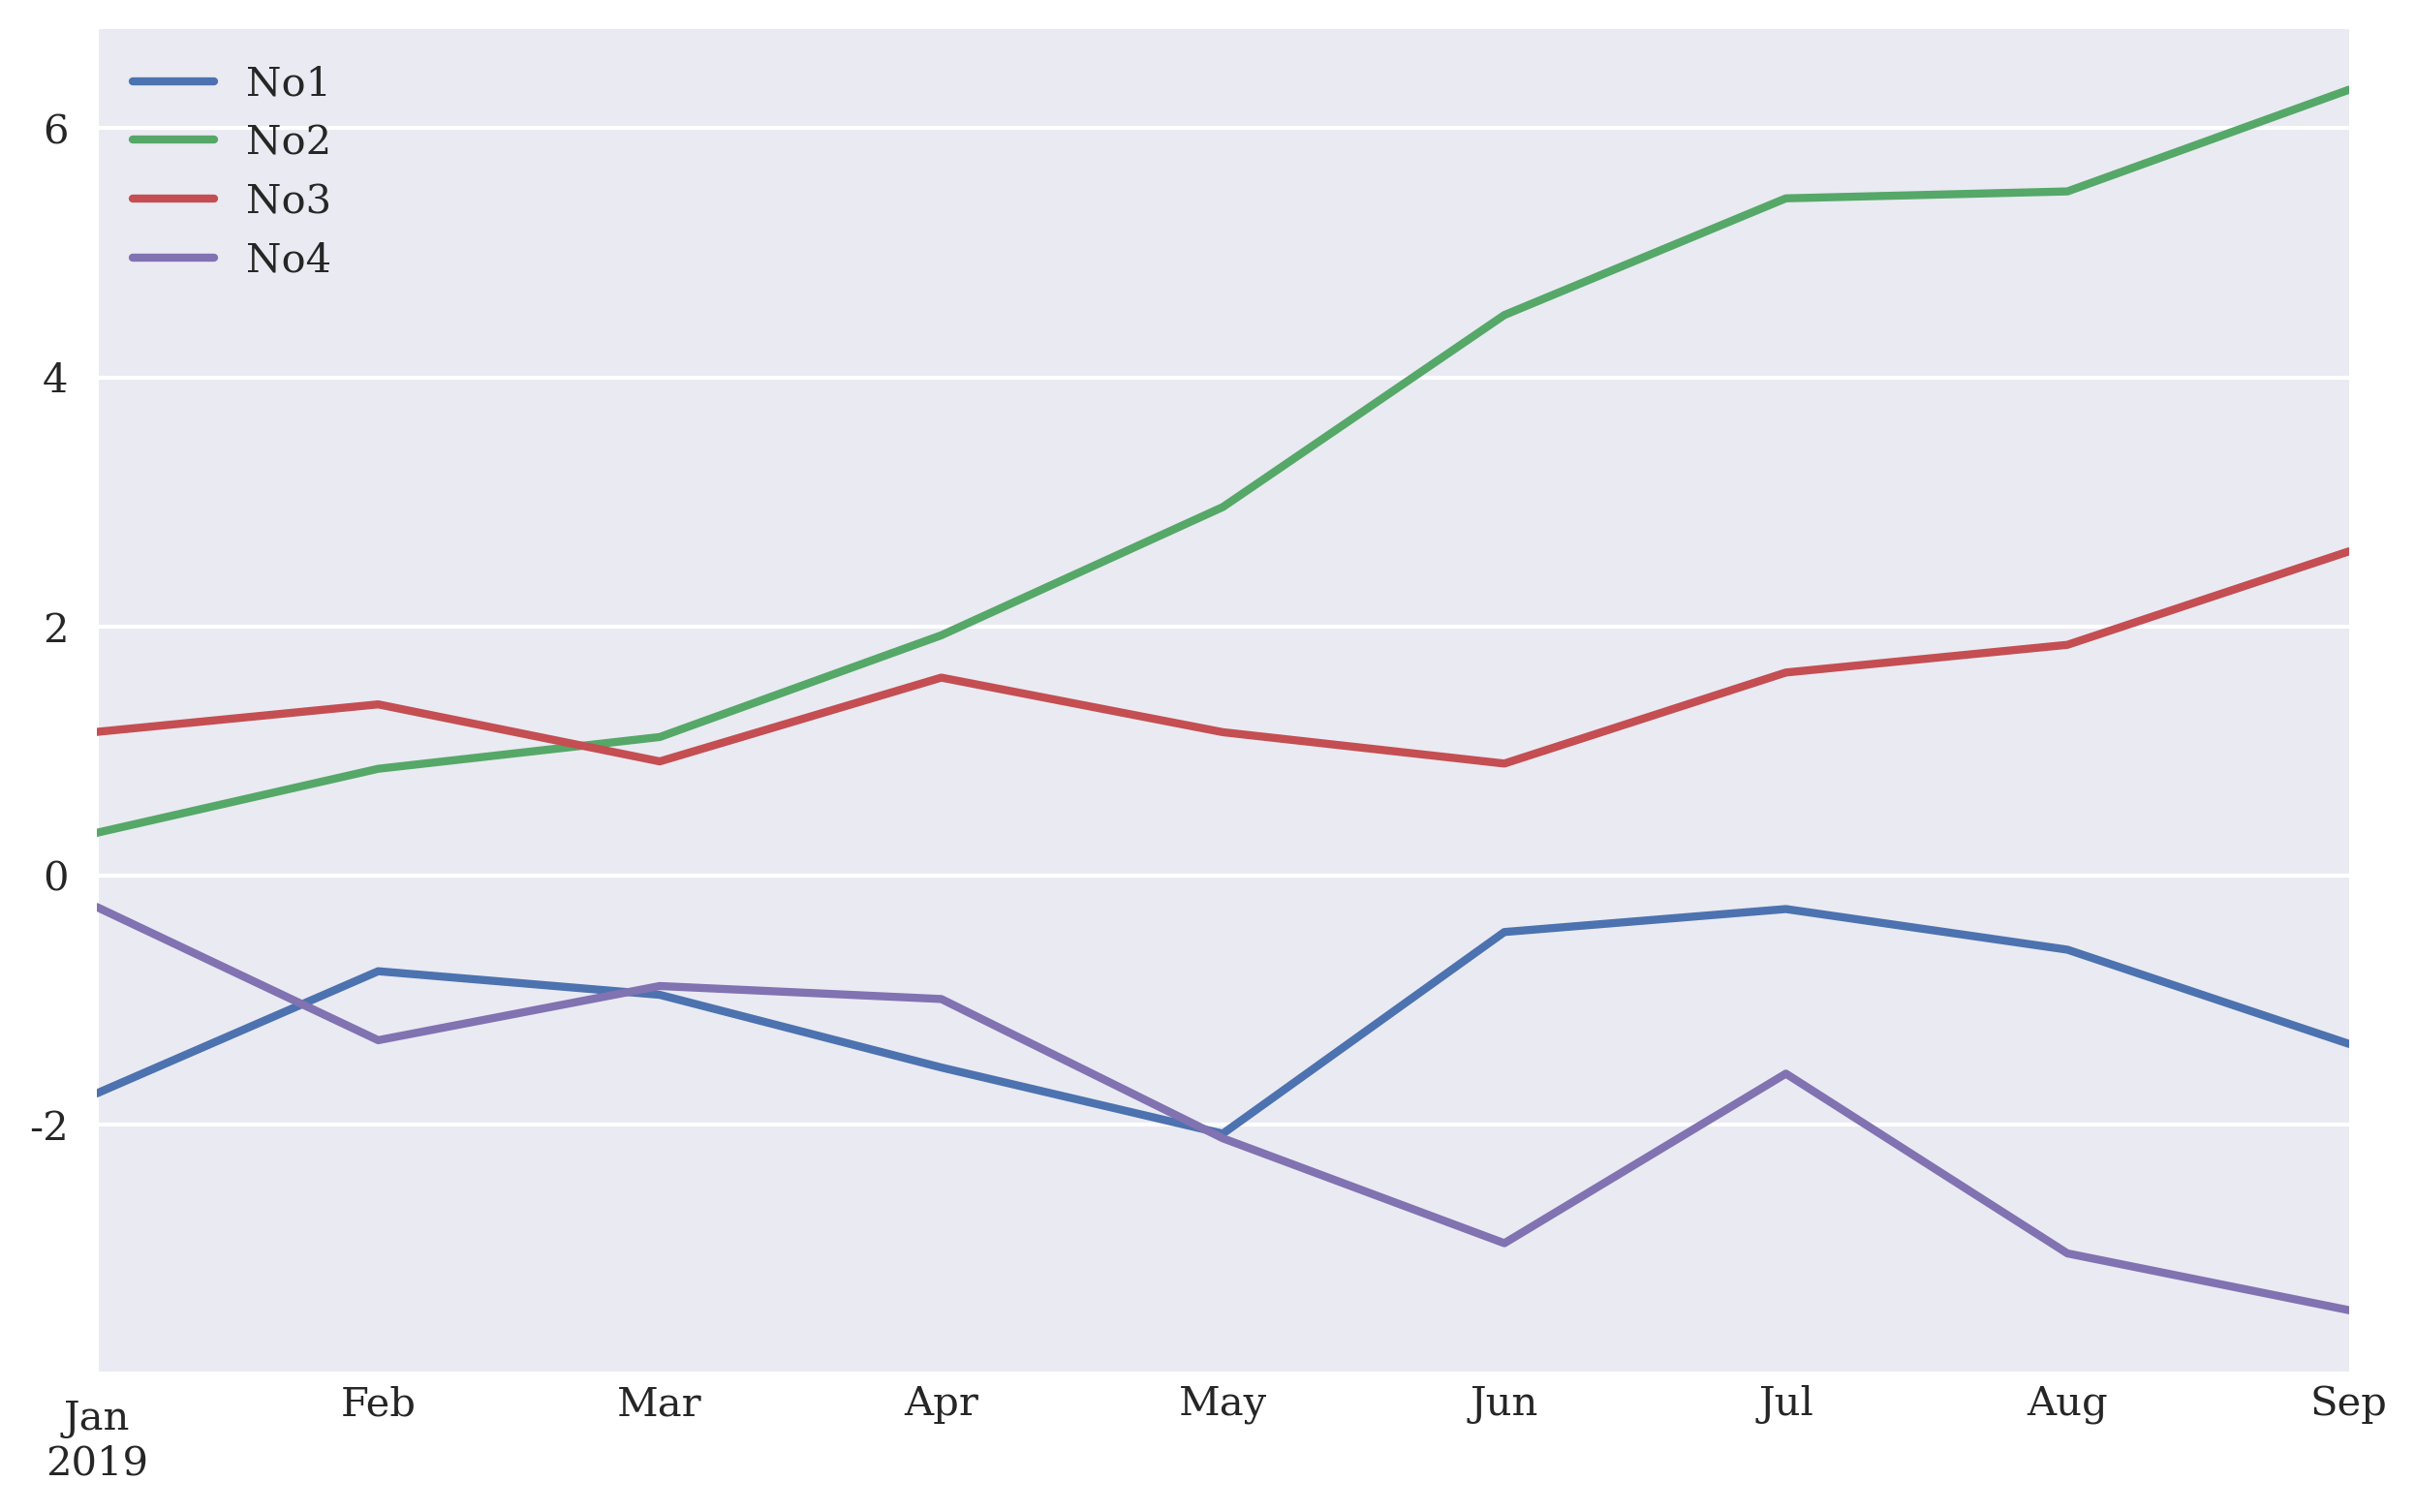

In [44]:
df.cumsum().plot(lw=2.0, figsize=(10, 6))

<Axes: >

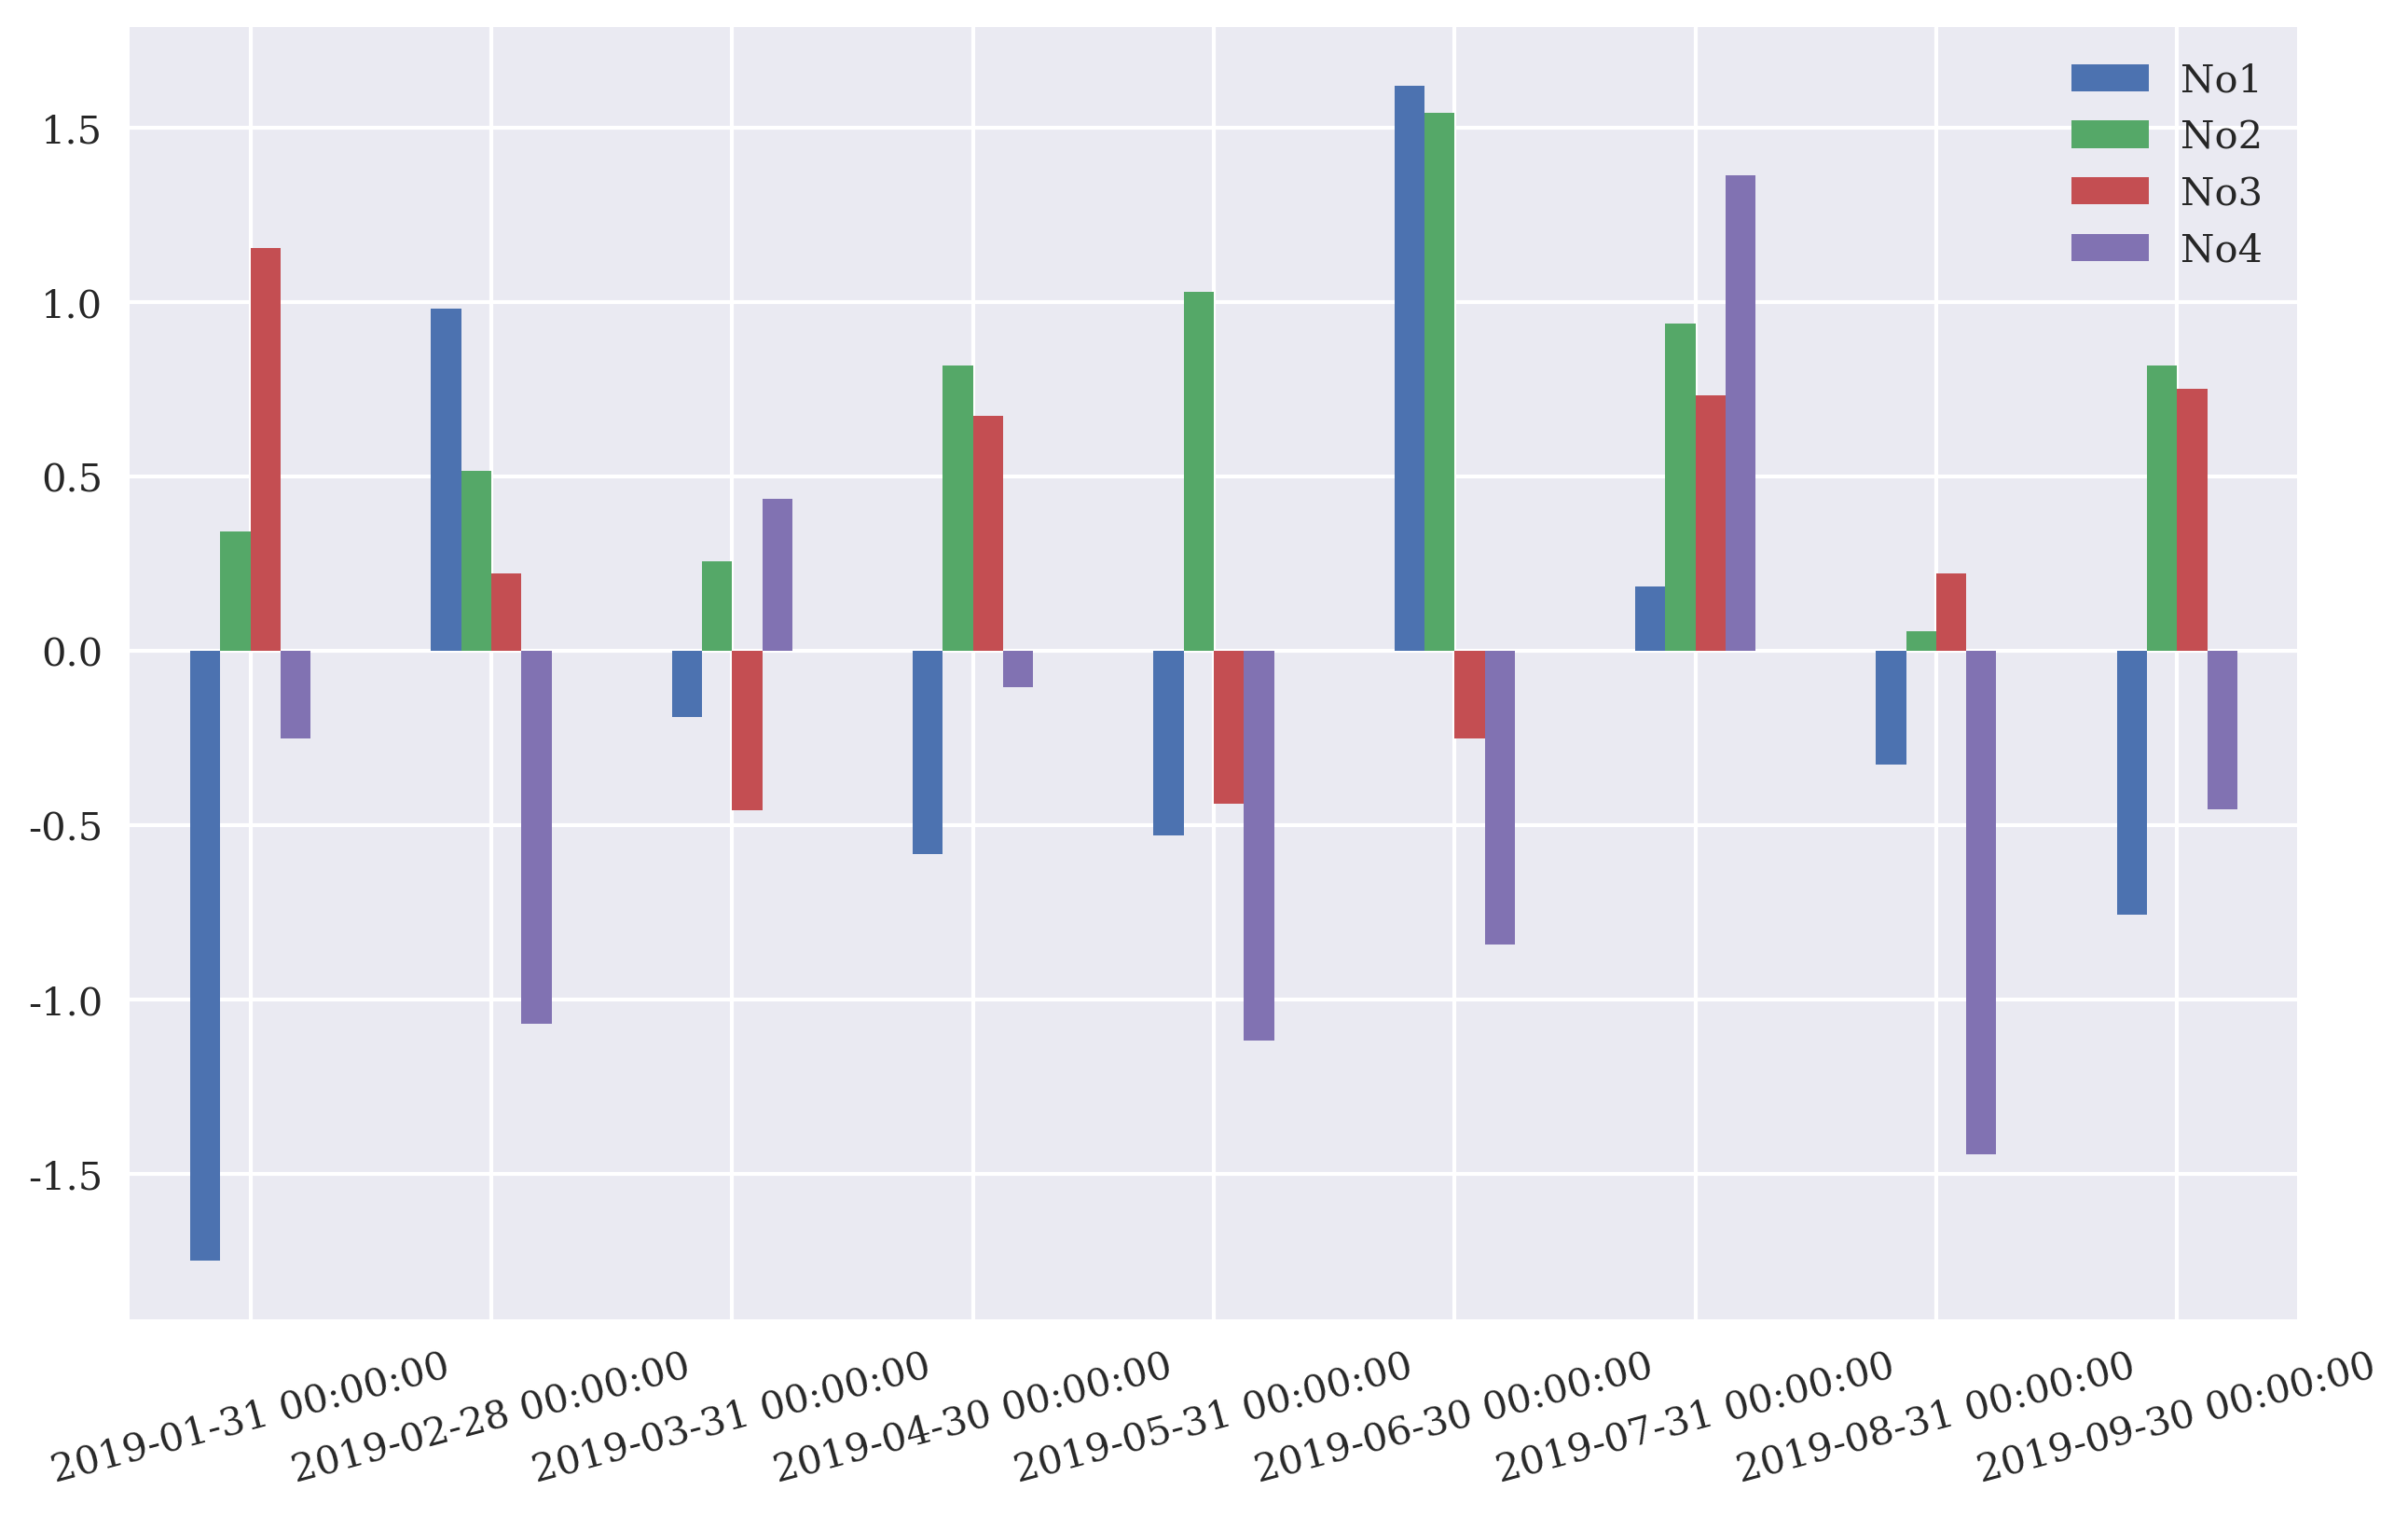

In [45]:
df.plot.bar(figsize=(10, 6), rot=15)
# df.plot(kind='bar', figsize=(10, 6), rot=15)

## The Series Class

In [46]:
type(df)

pandas.core.frame.DataFrame

In [47]:
s = pd.Series(np.linspace(0, 15, 7), name='series')

In [48]:
s

0     0.0
1     2.5
2     5.0
3     7.5
4    10.0
5    12.5
6    15.0
Name: series, dtype: float64

In [49]:
type(s)

pandas.core.series.Series

In [50]:
s = df['No1']

In [51]:
s


2019-01-31   -1.749765
2019-02-28    0.981321
2019-03-31   -0.189496
2019-04-30   -0.583595
2019-05-31   -0.531280
2019-06-30    1.618982
2019-07-31    0.184519
2019-08-31   -0.326238
2019-09-30   -0.756352
Freq: M, Name: No1, dtype: float64

In [52]:
type(s)

pandas.core.series.Series

In [53]:
s.mean()

-0.15021177307319458

<Axes: >

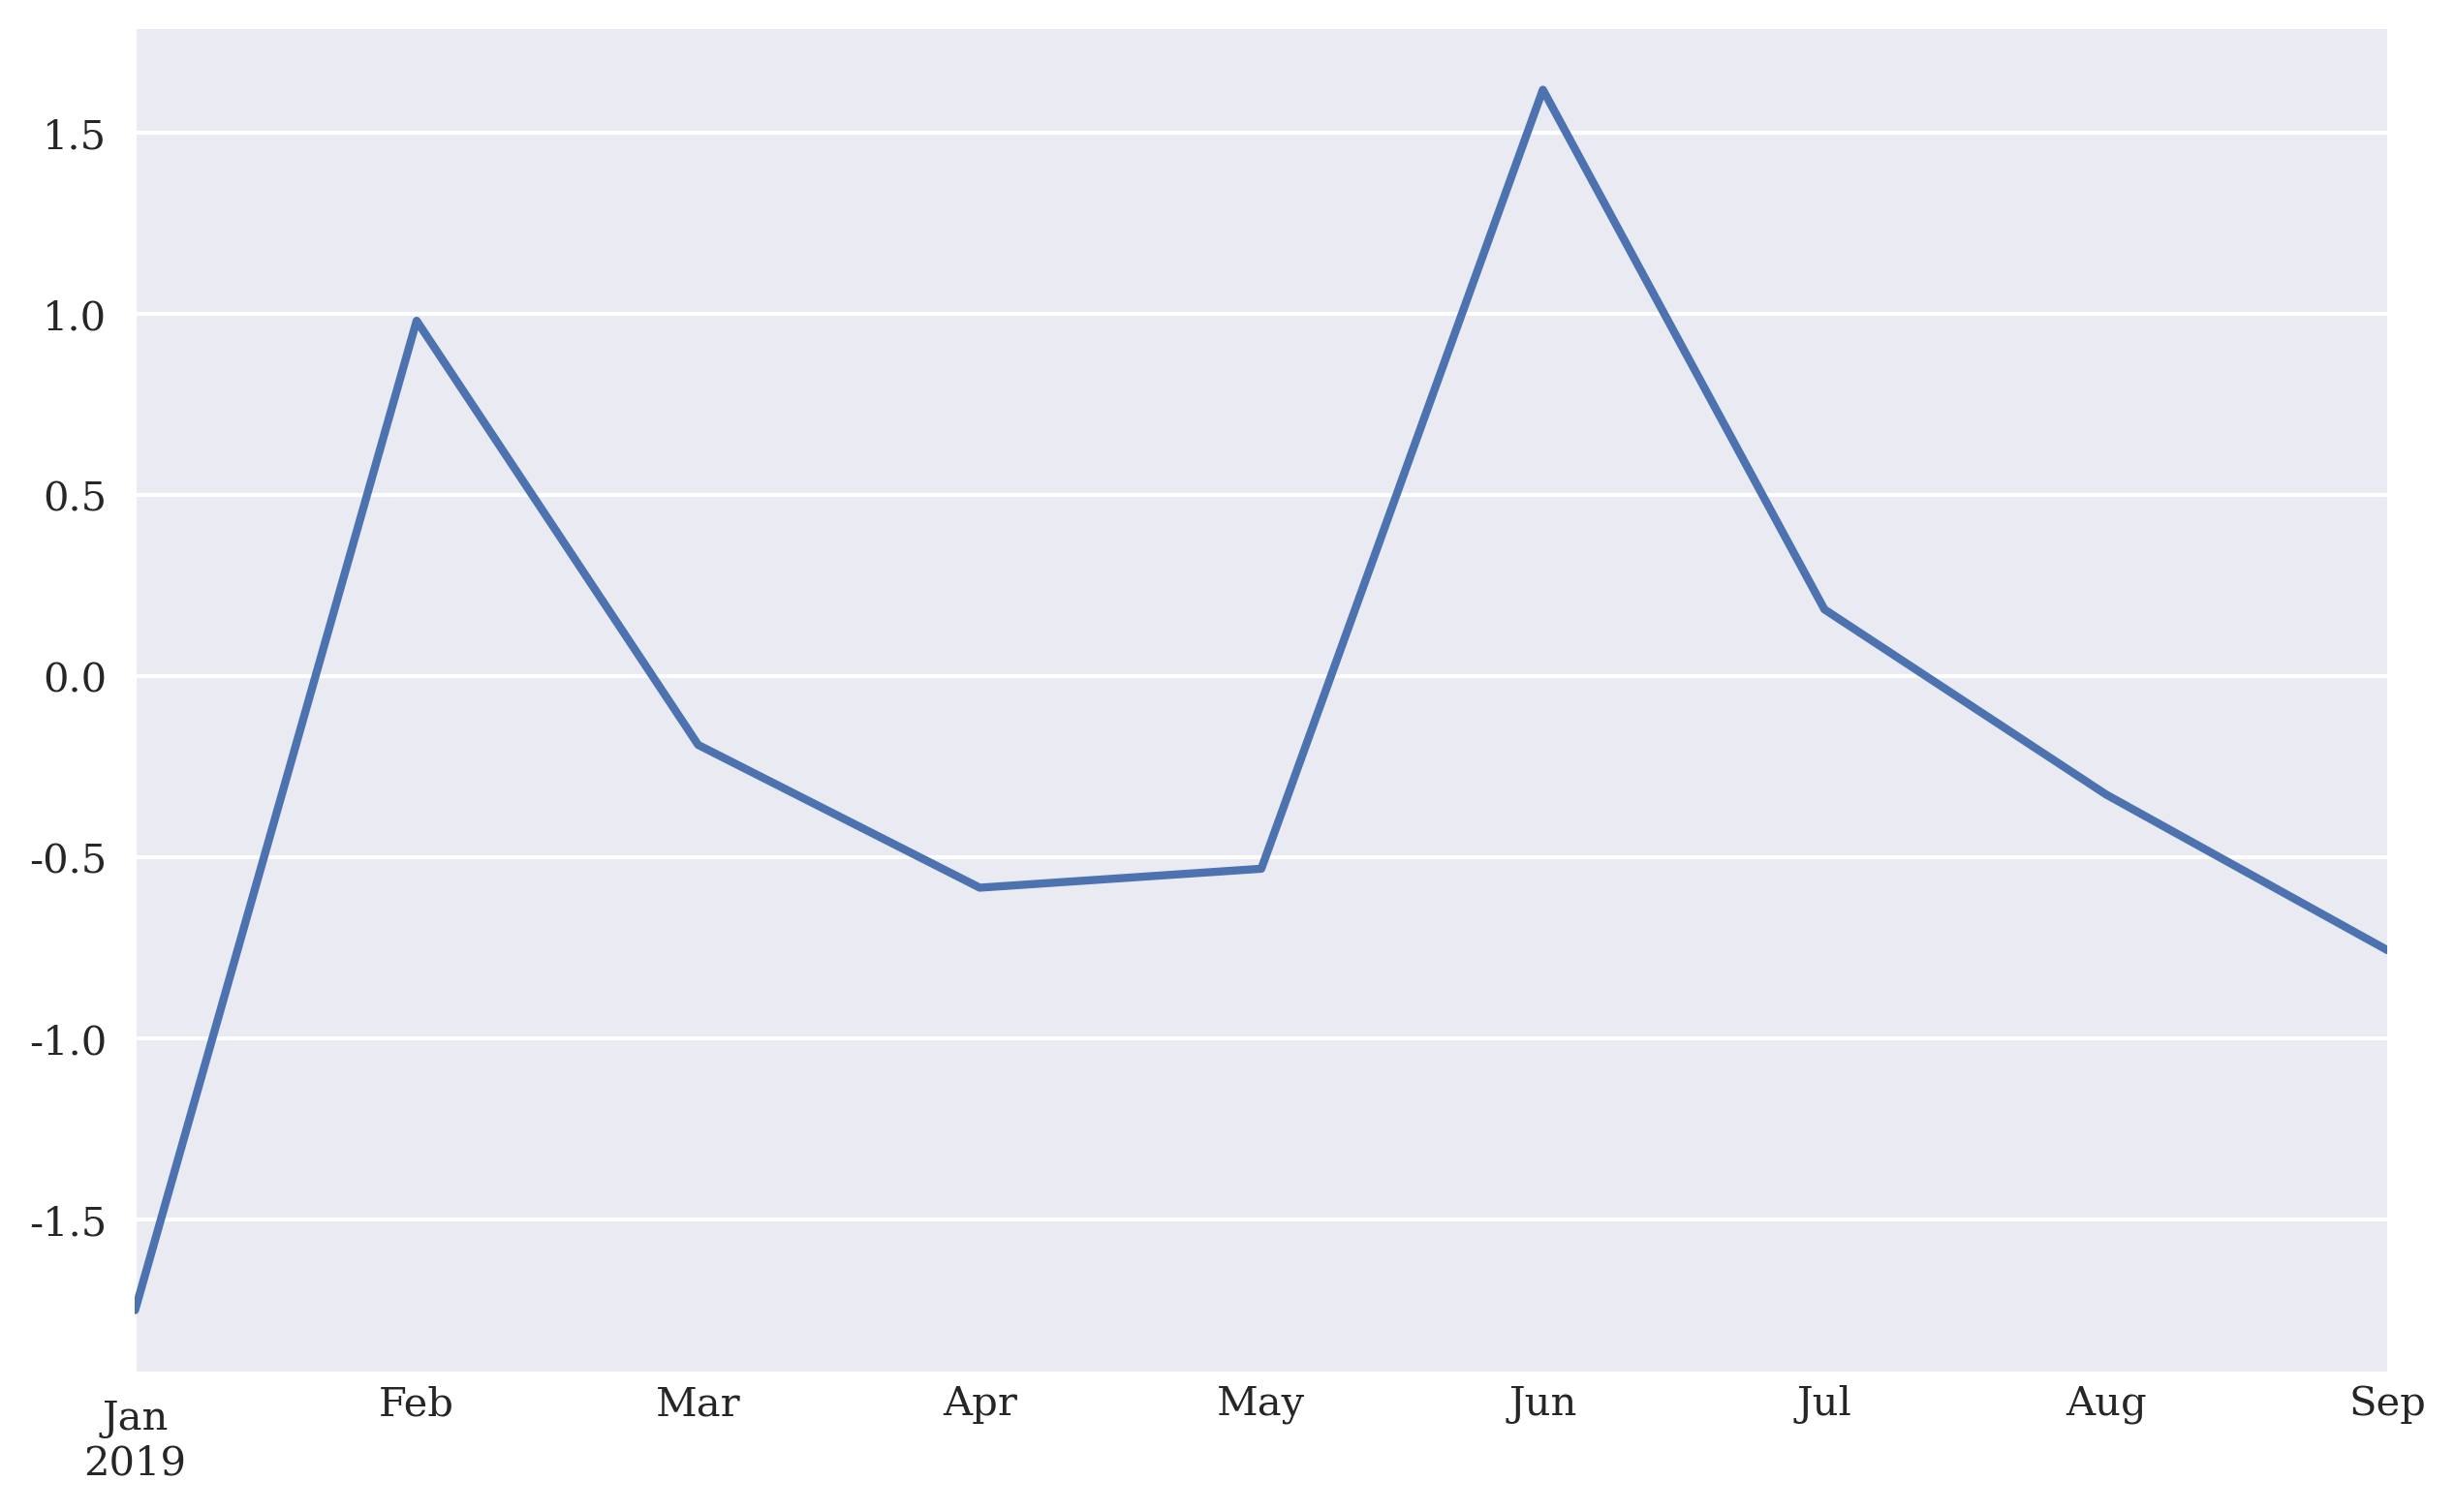

In [54]:
s.plot(lw=2.0, figsize=(10, 6))

## GroupBy Operations

In [55]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 
                 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2019-01-31,-1.749765,0.342680,1.153036,-0.252436,Q1
2019-02-28,0.981321,0.514219,0.221180,-1.070043,Q1
2019-03-31,-0.189496,0.255001,-0.458027,0.435163,Q1
2019-04-30,-0.583595,0.816847,0.672721,-0.104411,Q2
2019-05-31,-0.531280,1.029733,-0.438136,-1.118318,Q2
2019-06-30,1.618982,1.541605,-0.251879,-0.842436,Q2
2019-07-31,0.184519,0.937082,0.731000,1.361556,Q3
2019-08-31,-0.326238,0.055676,0.222400,-1.443217,Q3
2019-09-30,-0.756352,0.816454,0.750445,-0.455947,Q3


In [56]:
groups = df.groupby('Quarter')

In [57]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [58]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.319314,0.370634,0.305396,-0.295772
Q2,0.168035,1.129395,-0.005765,-0.688388
Q3,-0.299357,0.603071,0.567948,-0.179203


In [59]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.981321,0.514219,1.153036,0.435163
Q2,1.618982,1.541605,0.672721,-0.104411
Q3,0.184519,0.937082,0.750445,1.361556


In [60]:
groups.aggregate(['min', 'max']).round(2)

No1         No2         No3         No4      
          min   max   min   max   min   max   min   max
Quarter                                                
Q1      -1.75  0.98  0.26  0.51 -0.46  1.15 -1.07  0.44
Q2      -0.58  1.62  0.82  1.54 -0.44  0.67 -1.12 -0.10
Q3      -0.76  0.18  0.06  0.94  0.22  0.75 -1.44  1.36

In [61]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even',
                  'Odd', 'Even', 'Odd', 'Even', 'Odd']
df

,No1,No2,No3,No4,Quarter,Odd_Even
2019-01-31,-1.749765,0.342680,1.153036,-0.252436,Q1,Odd
2019-02-28,0.981321,0.514219,0.221180,-1.070043,Q1,Even
2019-03-31,-0.189496,0.255001,-0.458027,0.435163,Q1,Odd
2019-04-30,-0.583595,0.816847,0.672721,-0.104411,Q2,Even
2019-05-31,-0.531280,1.029733,-0.438136,-1.118318,Q2,Odd
2019-06-30,1.618982,1.541605,-0.251879,-0.842436,Q2,Even
2019-07-31,0.184519,0.937082,0.731000,1.361556,Q3,Odd
2019-08-31,-0.326238,0.055676,0.222400,-1.443217,Q3,Even
2019-09-30,-0.756352,0.816454,0.750445,-0.455947,Q3,Odd


In [62]:
groups = df.groupby(['Quarter', 'Odd_Even'])

In [63]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [64]:
groups[['No1', 'No2']].aggregate(['sum', 'mean']).round(2)

No1         No2      
                   sum  mean   sum  mean
Quarter Odd_Even                        
Q1      Even      0.98  0.98  0.51  0.51
        Odd      -1.94 -0.97  0.60  0.30
Q2      Even      1.04  0.52  2.36  1.18
        Odd      -0.53 -0.53  1.03  1.03
Q3      Even     -0.33 -0.33  0.06  0.06
        Odd      -0.57 -0.29  1.75  0.88

## Complex Selection

In [65]:
data = np.random.standard_normal((10, 2))
data

array([[ 1.18962227, -1.69061683],
       [-1.35639905, -1.23243451],
       [-0.54443916, -0.66817174],
       [ 0.00731456, -0.61293874],
       [ 1.29974807, -1.73309562],
       [-0.9833101 ,  0.35750775],
       [-1.6135785 ,  1.47071387],
       [-1.1880176 , -0.54974619],
       [-0.94004616, -0.82793236],
       [ 0.10886347,  0.50780959]])

In [66]:
df = pd.DataFrame(data, columns=['x', 'y'])
df

,x,y
0,1.189622,-1.690617
1,-1.356399,-1.232435
2,-0.544439,-0.668172
3,0.007315,-0.612939
4,1.299748,-1.733096
5,-0.983310,0.357508
6,-1.613579,1.470714
7,-1.188018,-0.549746
8,-0.940046,-0.827932
9,0.108863,0.507810


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10 non-null     float64
 1   y       10 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


In [68]:
df.head()

,x,y
0,1.189622,-1.690617
1,-1.356399,-1.232435
2,-0.544439,-0.668172
3,0.007315,-0.612939
4,1.299748,-1.733096


In [69]:
df.tail()

,x,y
5,-0.983310,0.357508
6,-1.613579,1.470714
7,-1.188018,-0.549746
8,-0.940046,-0.827932
9,0.108863,0.507810


In [70]:
df['x'] > 0.5

0     True
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
9    False
Name: x, dtype: bool

In [71]:
(df['x'] > 0) & (df['y'] < 0)

0     True
1    False
2    False
3     True
4     True
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [72]:
(df['x'] > 0) | (df['y'] < 0)

0     True
1     True
2     True
3     True
4     True
5    False
6    False
7     True
8     True
9     True
dtype: bool

In [73]:
df[df['x'] > 0]

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096
9,0.108863,0.507810


In [74]:
df.query('x > 0')

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096
9,0.108863,0.507810


In [75]:
df[(df['x'] > 0) & (df['y'] < 0)]

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096


In [76]:
df.query('x > 0 & y < 0')

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096


In [77]:
df[(df.x > 0) | (df.y < 0)]

,x,y
0,1.189622,-1.690617
1,-1.356399,-1.232435
2,-0.544439,-0.668172
3,0.007315,-0.612939
4,1.299748,-1.733096
7,-1.188018,-0.549746
8,-0.940046,-0.827932
9,0.108863,0.507810


In [78]:
df > 0

,x,y
0,True,False
1,False,False
2,False,False
3,True,False
4,True,False
5,False,True
6,False,True
7,False,False
8,False,False
9,True,True


In [79]:
df[df > 0]

,x,y
0,1.189622,NaN
1,NaN,NaN
2,NaN,NaN
3,0.007315,NaN
4,1.299748,NaN
5,NaN,0.357508
6,NaN,1.470714
7,NaN,NaN
8,NaN,NaN
9,0.108863,0.507810


## Concatenation, Joining, and Merging

In [80]:
df1 = pd.DataFrame(['100', '200', '300', '400'],
                   index=['a', 'b', 'c', 'd'],
                   columns=['A'])

In [81]:
df1

,A
a,100
b,200
c,300
d,400


In [82]:
df2 = pd.DataFrame(['200', '150', '50'],
                   index=['f', 'b', 'd'],
                   columns=['B'])
df2

,B
f,200
b,150
d,50


### Concatenation

In [83]:
# df1.append(df2, sort=False)
pd.concat([df1, df2], sort=False)

,A,B
a,100,NaN
b,200,NaN
c,300,NaN
d,400,NaN
f,NaN,200
b,NaN,150
d,NaN,50


In [84]:
# df1.append(df2, ignore_index=True, sort=False)
pd.concat([df1, df2], ignore_index=True, sort=False)

,A,B
0,100,NaN
1,200,NaN
2,300,NaN
3,400,NaN
4,NaN,200
5,NaN,150
6,NaN,50


### Joining

In [85]:
df1.join(df2)

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [86]:
df2.join(df1)

,B,A
f,200,NaN
b,150,200
d,50,400


In [87]:
df1.join(df2, how='left')

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [88]:
df1.join(df2, how='right')

,A,B
f,NaN,200
b,200,150
d,400,50


In [89]:
df1.join(df2, how='inner')

,A,B
b,200,150
d,400,50


In [90]:
df1.join(df2, how='outer')

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50
f,NaN,200


In [91]:
df = pd.DataFrame()

In [92]:
df['A'] = df1['A']

In [93]:
df

,A
a,100
b,200
c,300
d,400


In [94]:
df['B'] = df2['B']
df

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [95]:
df = pd.DataFrame({'A': df1['A'], 'B': df2['B']})
df

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50
f,NaN,200


### Merging

In [96]:
c = pd.Series([250, 150, 50], index=['b', 'd', 'c'])
df1['C'] = c
df2['C'] = c

In [97]:
df1

,A,C
a,100,NaN
b,200,250.0
c,300,50.0
d,400,150.0


In [98]:
df2

,B,C
f,200,NaN
b,150,250.0
d,50,150.0


In [99]:
pd.merge(df1, df2)

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,400,150.0,50


In [100]:
pd.merge(df1, df2, on='C')

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,400,150.0,50


In [101]:
pd.merge(df1, df2, how='outer')

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,300,50.0,NaN
3,400,150.0,50


In [102]:
pd.merge(df1, df2, left_on='A', right_on='B')

,A,C_x,B,C_y
0,200,250.0,200,NaN


In [103]:
pd.merge(df1, df2, left_on='A', right_on='B', how='outer')

,A,C_x,B,C_y
0,100,NaN,NaN,NaN
1,200,250.0,200,NaN
2,300,50.0,NaN,NaN
3,400,150.0,NaN,NaN
4,NaN,NaN,150,250.0
5,NaN,NaN,50,150.0


In [104]:
pd.merge(df1, df2, left_index=True, right_index=True)

,A,C_x,B,C_y
b,200,250.0,150,250.0
d,400,150.0,50,150.0


In [105]:
pd.merge(df1, df2, on='C', left_index=True, right_index=True)

MergeError: Can only pass argument "on" OR "left_index" and "right_index", not a combination of both.

## Performance Aspects

In [ ]:
data = np.random.standard_normal((1000000, 2))

In [ ]:
data.nbytes

16000000

In [ ]:
df = pd.DataFrame(data, columns=['x', 'y'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   x       1000000 non-null  float64
 1   y       1000000 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [ ]:
%time res = df['x'] * df['y']

CPU times: user 4.09 ms, sys: 3.45 ms, total: 7.53 ms
Wall time: 5.72 ms


In [ ]:
res[:3]

0   -1.077327
1    0.070833
2   -0.016436
dtype: float64

In [ ]:
%time res = df.sum(axis=1)

CPU times: user 120 ms, sys: 21.9 ms, total: 142 ms
Wall time: 144 ms


In [ ]:
res[:3]

0    0.387242
1   -0.969343
2   -0.863159
dtype: float64

In [ ]:
%time res = df.values.sum(axis=1)

CPU times: user 14 ms, sys: 3.57 ms, total: 17.5 ms
Wall time: 15.7 ms


In [ ]:
res[:3]

array([ 0.3872424 , -0.96934273, -0.86315944])

In [ ]:
%time res = np.sum(df.values, axis=1)

CPU times: user 13.8 ms, sys: 3.55 ms, total: 17.4 ms
Wall time: 15.3 ms


In [ ]:
res[:3]

array([ 0.3872424 , -0.96934273, -0.86315944])

In [ ]:
%time res = df.eval('x + y')

CPU times: user 11.7 ms, sys: 26.7 ms, total: 38.4 ms
Wall time: 14.6 ms


In [ ]:
res[:3]

0    0.387242
1   -0.969343
2   -0.863159
dtype: float64

In [ ]:
%time res = df.apply(lambda row: row['x'] + row['y'], axis=1)

CPU times: user 6.12 s, sys: 101 ms, total: 6.23 s
Wall time: 6.24 s


In [ ]:
res[:3]

0    0.387242
1   -0.969343
2   -0.863159
dtype: float64